In [1]:
import os

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from src.waveform.utils import load_waveform, trim_waveform
from src.waveform.augmentation import zero_mean, normalize_by_std, random_resample, random_gain, mixup

Let's load an example of voice recording taken from Open Speech Repository

In [2]:
w, sr = load_waveform(os.environ['PROJECT_DIR'] + '/data/OSR_us_000_0030_8k.wav')

And apply augmentation functions to see how they modify the waveform

In [3]:
trimmed_w = trim_waveform(waveform=w, start_time=10, end_time=20, sample_rate=sr)
zero_mean_w = zero_mean(trimmed_w)
normalized_w = normalize_by_std(zero_mean_w)
resampled_w = random_resample(waveform=trimmed_w, orig_sample_rate=sr, trim=True)
amplified_w = random_gain(trimmed_w)
mixed_w_1, mixed_w_2 = mixup(
    waveform1=trimmed_w,
    waveform2=trim_waveform(waveform=w, start_time=20, end_time=30, sample_rate=sr)
)

In [4]:
waveforms = {
    'normal': trimmed_w,
    'zero-mean': zero_mean_w,
    'normalization': normalized_w,
    'resampling': resampled_w,
    'amplification': amplified_w,
    'mixup (1st waveform)': mixed_w_1,
    'mixup (2nd waveform)': mixed_w_2
}

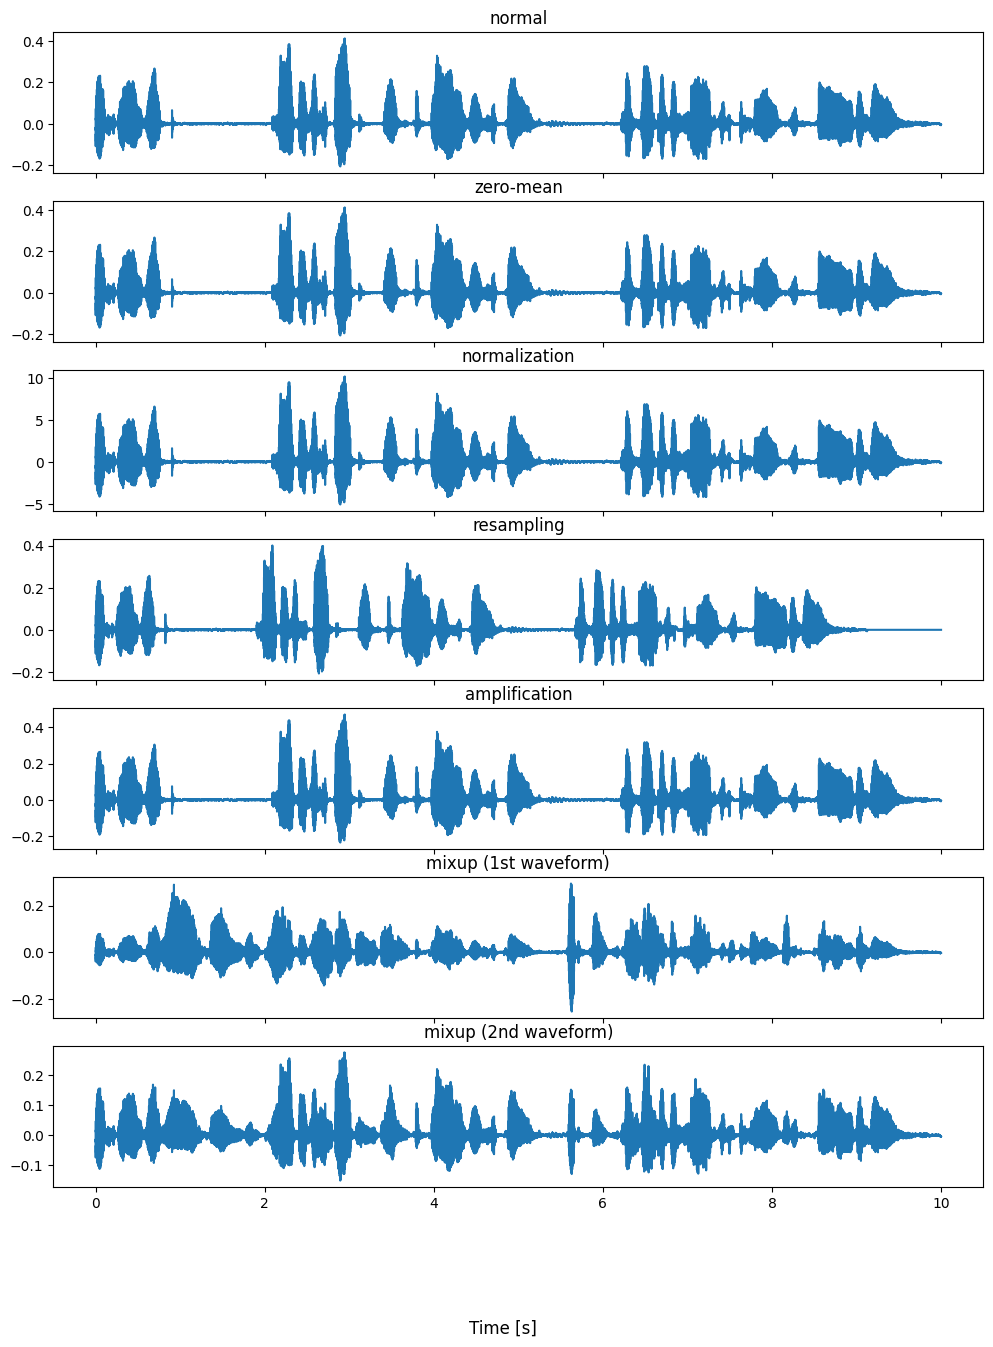

In [5]:
fig, ax = plt.subplots(nrows=len(waveforms), ncols=1, sharex=True, figsize=(12, 15))
fig.supxlabel('Time [s]')

for i, (name, waveform) in enumerate(waveforms.items()):
    ax[i].set_title(name)
    sns.lineplot(y=waveform.tolist()[0], x=np.arange(waveform.shape[1]) / sr, ax=ax[i])